# MAC0318 - Teoria de controle - Notebook 1

*Pr√©-requisitos*: 
- **Software**: Para rodar este notebook corretamente, voc√™ deve ter o Python na vers√£o 3.9 ou mais recente e a biblioteca NumPy instalada. Antes de come√ßar, assegure-se de que essas condi√ß√µes s√£o satisfeitas.
- **Conhecimento**: Esta atividade assume familiaridade com o uso de notebooks Jupyter, manipula√ß√£o de matrizes usando a bilbioteca NumPy e conhecimentos b√°sicos de modelagem de sistemas de controle. Recomendamos seguir algum tutorial da internet antes de realizar essa atividade, se esse n√£o for o seu caso. 

<span style="color:blue">Se voc√™ est√° rodando o notebook em sala de aula, voc√™ deve ativar o ambiente `duckievillage` antes de abrir o jupyter notebook e escolher o kernel `duckievillage`, para que os requerimentos sejam satisfeitos.</red>

# Controle PID

Um controlador emite sinals de comando que s√£o executados pelo rob√¥ visando atingir um objetivo. No caso do rob√¥ diferencial, os sinais de controle s√£o os valores de tens√£o el√©trica enviados para cada roda. 
√â mais simples no entanto projetar controladores que controlam diretamente a velocidade $v$ e a orienta√ß√£o $\omega$ do rob√¥. Para um dado sinal de controle $u=\begin{bmatrix} v & \omega \end{bmatrix}$, podemos encontrar os valores de controle de tens√£o para cada roda resolvendo os sistema de equa√ß√£o abaixo.

$$
\begin{bmatrix} v \\ \omega \end{bmatrix} = K_m \frac{R}{2} \begin{bmatrix} 1 & 1 \\ \frac{1}{L} & -\frac{1}{L} \end{bmatrix} \begin{bmatrix} \varphi_l \\ \varphi_r \end{bmatrix}
$$

na qual $K_m$ √© uma constante que relaciona a velocidade angular √† tens√£o dos motores. Tal constante pode ser estimada empiricamente ou simplesmente ignorada para o projeto de um controlador PID (e considerada embutida nas constantes do projeto, como veremos a seguir).

O controlador **P**roporcional-**I**ntegral-**D**erivativo (PID) √© um controlador retroalimentado que usa a sa√≠da $y(t)$ do sistema para medir o erro de trajet√≥ria $e(t)$ com rela√ß√£o a um sinal de refer√™ncia $r(t)$ e produzir um sinal de controle $u(t)$ que busque reduzir o erro.

<figure>
  <div style="text-align:center;">
  <img src="img/pid-control-diagram.jpg" alt="pid-loop-2" style="width: 300px;"/>
  <figcaption>Controle PID</figcaption>
  </div>
</figure>

A parte proporcional relaciona a intensidade do valor de controle √† magnitude do erro; a parte derivativa busca antecipar erros. Por fim, a parte integrativa busca minimizar o erro acumulado introduzido pela insufici√™ncia de corre√ß√£o da parte proporcional, al√©m de atenuar ru√≠dos. A equa√ß√£o completa do controlador PID √© dada pela soma de cada componente:

$$ u_t = K_p e(t) + K_i \int_0^t e(\tau) d \tau + K_d \frac{d e_t}{dt},$$

com $K_p$, $K_i$, and $K_d$ denotando as constantes a serem especificadas. Existem in√∫meras t√©cnicas para projetar tais constantes usando o modelo de malha fechada do sistema e/ou dados experimentais. No entanto, a atratividade do controle PID adv√©m do fato que √© poss√≠vel ajustar tais constantes de maneira completamente emp√≠rica (por tentativa e erro) e obter comportamento satisfat√≥rio (ainda que sub√≥timo). O procedimento de ajuste em geral consiste em:

1. Encontrar um valor de $K_p$ que torne o sistema control√°vel assintoticamente est√°vel mas com alguma oscila√ß√£o, mantendo $K_i=K_d=0$.
2. Ajustar o valor de $K_d$ para diminuir as oscila√ß√µes sem que o tempo de resposta do sistema se altere significativamente.
3. Por fim, ajustar o valor de $K_i$ para mitigar o erro assint√≥tico.

Note que esse procedimento √© puramente heur√≠stico: ele n√£o garante que o sistema controlado seja est√°vel, possua bom desempenho nem seja robusto.

## Seguindo um ponto

Vamos projetar um controlador proporcional para mover o rob√¥ a uma posi√ß√£o desejada $G = (x^*, y^*)$. O estado do sistema ser√° a pose $q(t) = \begin{bmatrix} x(t) & y(t) & \theta(t) \end{bmatrix}^t$.

<figure>
  <div style="text-align:center;">
  <img src="img/point_following.png" alt="pid-loop-2" style="width: 300px;"/>
  <figcaption>Controle PID</figcaption>
  </div>
</figure>

A sa√≠da do sistema √© a dist√¢ncia do centro do referencial local rob√¥ (A) ao ponto meta (G) e a diferen√ßa entre a orienta√ß√£o do rob√¥ e o referencial centrado na meta e paralelo ao referencial fixo:
$$
   y(t) = \begin{bmatrix} d(t) & \alpha(t) \end{bmatrix}^t .
$$
Tais valores podem ser calculados a partir da pose do rob√¥ como:
$$
d = \sqrt{ (x^*-x)^2 + (y^*-y)^2 }
$$
e
$$
\alpha = \arctan \frac{y^*-y}{x^*-x} .
$$

In [5]:
# Vamos usar o mesmo simulador da atividade de modelagem
from DifferentialDrive import DifferentialRobot
import numpy as np

## Controlador para seguidor de ponto

Vamos projetar um controlador proporcional para seguir o ponto $G$ atrav√©s da seguinte regra de controle:
$$
u(t) = \begin{bmatrix} v \\ \omega\end{bmatrix} = \begin{bmatrix} K_d d \\ K_\alpha \alpha \end{bmatrix}
$$

O c√≥digo abaixo implementa o controlador proporcional de posi√ß√£o.

Experimente modificar as configura√ß√µes do controlador de posi√ß√£o a seguir, alterando as constantes $K_{d}$ e $K_{\alpha}$, assim como a posi√ß√£o da meta.
Procure notar a rela√ß√£o entre estabilidade e desempenho ao modificar as constantes.

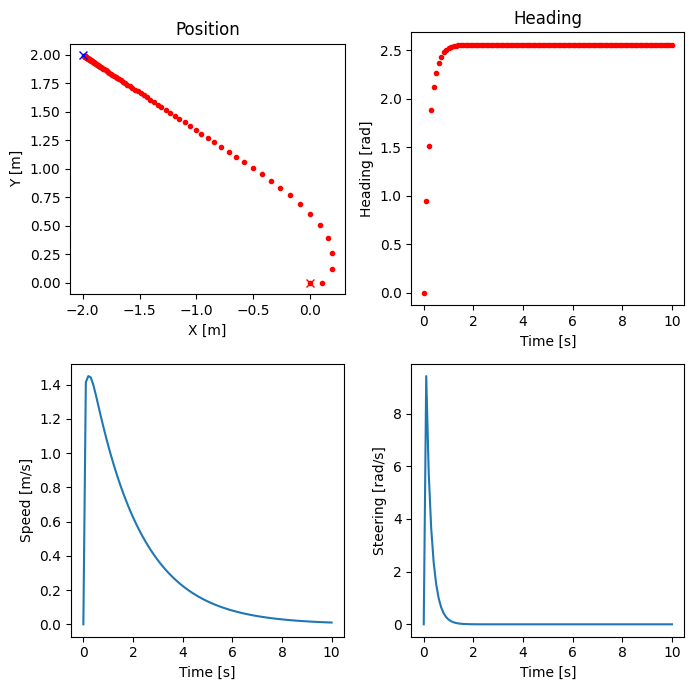

In [6]:
robot = DifferentialRobot()

goal = np.array([-2,2]) # posi√ß√£o da meta

e_p, e_t = [], [] # armazenar valores de erro para gera√ß√£o de gr√°fico

Kd = 0.5 # constante proporcional para controle de velocidade
Ka = 4.0 # constante proporcional para controle de rota√ß√£o

for _ in range(100): # simular 100 passos (10s)
    # Calcular erro de posi√ß√£o
    diff = goal-robot.x[:2]
    error_pos = np.sqrt( np.dot(diff, diff) )
    # Calcular erro de orienta√ß√£o
    error_theta = np.arctan2( diff[1], diff[0] ) - robot.x[2]
    e_p.append(error_pos)
    e_t.append(error_theta)
    # Controle proporcional
    speed = Kd*error_pos
    steer = Ka*error_theta
    robot.forward(speed, steer)
fig, axes = robot.plot()
axes[0,0].plot([0],[0], 'rx'); # desenhar in√≠cio em vermelho
axes[0,0].plot(goal[0],goal[1], 'bx'); # desenhar meta em azul

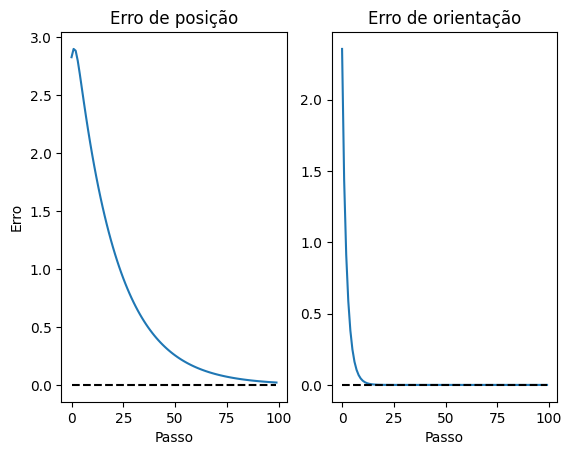

In [7]:
# Rode esse c√©lula para exibir os gr√°ficos de erro por tempo

import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,2)
ax[0].plot(e_p);
ax[0].plot([0,len(e_p)-1], [0,0], 'k--')
ax[0].set_xlabel('Passo');
ax[0].set_ylabel('Erro');
ax[0].set_title('Erro de posi√ß√£o');
ax[1].plot(e_t);
ax[1].plot([0,len(e_t)-1], [0,0], 'k--')
ax[1].set_title('Erro de orienta√ß√£o');
ax[1].set_xlabel('Passo');

## üí° Exerc√≠cio

Modifique o controlador acima introduzindo as constantes $K_d$ e $K_i$. Para implementar o controle integrativo, voc√™ precisa calcular a integral do erro at√© o instante atual. Como n√£o possu√≠mos uma f√≥rmula fechada para o erro, tal integral s√≥ pode ser calculada de forma aproximada.
Uma aproxima√ß√£o simples mas comumente satisfat√≥ria √© aproximar a integral por uma soma finita:

$$ 
e_{int}(t) = \int_0^t e(\tau) d\tau \simeq \sum_{i=0}^{k} e_i \Delta t = (e_0 + e_1 + \dots + e_{k-1} + e_k)\Delta t .
$$
Na equa√ß√£o acima assumimos que as observa√ß√µes dos erros s√£o uniformemente espa√ßadas no tempo. √â poss√≠vel escrever equa√ß√£o similar para o caso de espa√ßamentos n√£o uniformes tamb√©m. A implementa√ß√£o acima √© computacionalmente ineficiente e pode levar a imprecis√µes num√©ricas. Uma forma mais conveniente √© notar a rela√ß√£o:

$$ 
e_{int,k}= (e_0 + e_1 + \dots + e_{k-1} + e_k)\Delta t = (e_0 + e_1 + \dots + e_{k-1})\Delta t + e_k\Delta t = e_{int,k-1} + e_k \Delta t.
$$
A √∫ltima equa√ß√£o acima calcula o erro acumulado a partir da observa√ß√£o atual e do erro acumulado anterior.


Realize o procedimento indicado para encontrar valores para as tr√™s constantes do controlador PID. Reflita sobre como o comportamento final foi modificado em rela√ß√£o ao controle puramente proporcional. Em particular, note se o tempo at√© que o erro convirja a zero diminui, se o sistema se tornou mais ou menos est√°vel. Reflita tamb√©m como voc√™ poderia analizar a robustez do sistema.

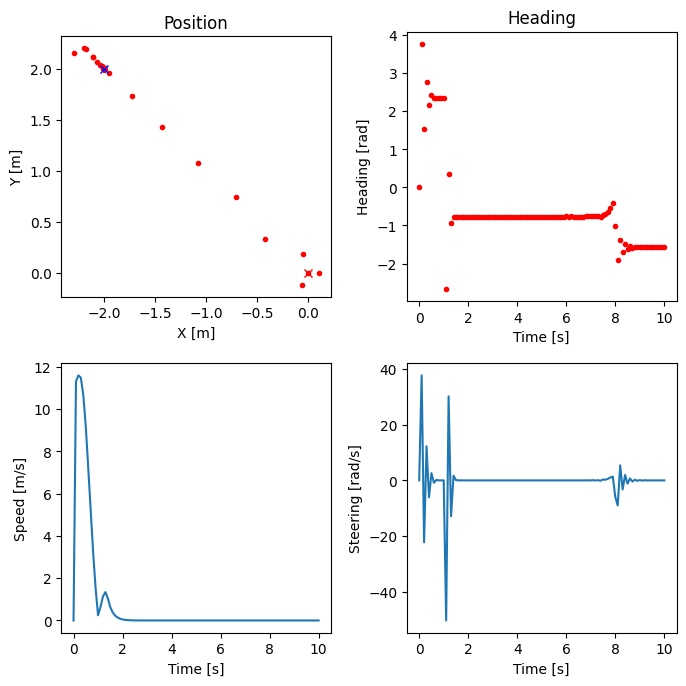

In [13]:
robot = DifferentialRobot()

goal = np.array([-2,2]) # posi√ß√£o da meta

e_p, e_t = [], [] # armazenar valores de erro para gera√ß√£o de gr√°fico

Kp_d = 4 # constante para controle proporcional de velocidade
Kp_a = 16.0 # constante para controle proporional de rota√ß√£o
Kd_d = 0.0 # constante para controle derivativo de velocidade
Kd_a = 0.0 # constante para controle derivativo de rota√ß√£o
Ki_d = 0.0 # constante para controle integrativo de velocidade
Ki_a = 0.0 # constante para controle integrativo de rota√ß√£o

last_error_pos = 0
last_error_theta = 0

def integral(values, delta):
    return sum(values)*delta

def derivada(v_futuro, v_atual, delta):
    return (v_futuro-v_atual)/(delta)


for _ in range(100): # simular 100 passos (10s)
    # Calcular erro de posi√ß√£o
    diff = goal-robot.x[:2]
    error_pos = np.sqrt( np.dot(diff, diff) )
    # Calcular erro de orienta√ß√£o
    error_theta = np.arctan2( diff[1], diff[0] ) - robot.x[2]
    e_p.append(error_pos)
    e_t.append(error_theta)
    # Controle PID: completar equa√ß√µes
    dt = robot.dt
    speed = Kp_d*error_pos + Kd_d*integral(e_p, dt) + Ki_d*derivada(error_pos, last_error_pos, dt)
    steer = Kp_a*error_theta + Kd_a*integral(e_t, dt) + Ki_a*derivada(error_theta, last_error_theta, dt)

    last_error_pos = error_pos
    last_error_theta = error_theta
    robot.forward(speed, steer)
fig, axes = robot.plot()
axes[0,0].plot([0],[0], 'rx'); # desenhar in√≠cio em vermelho
axes[0,0].plot(goal[0],goal[1], 'bx'); # desenhar meta em azul